In [3]:
import re
from matplotlib import pyplot as plt

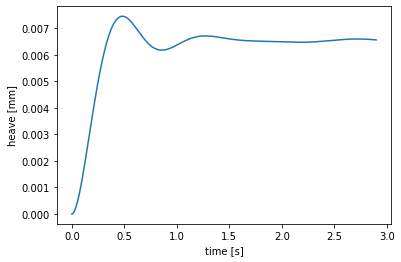

In [623]:
text = ""
with open("log.interFoam") as file:
    text = file.read()

centre_lines = re.findall(r'Courant Number mean: ([\d\.e-]+) max: ([\d\.e-]+).*?Time = ([\d\.e-]+)\n+.*?Centre of rotation: \(([\d\.e-]+) ([\d\.e-]+) ([\d\.e-]+)\)', text, flags=re.DOTALL)

cos = []
maxcos = []
ts = []
pos = []
for line in centre_lines:
    cos.append(float(line[0]))
    maxcos.append(float(line[1]))
    ts.append(float(line[2]))
    pos.append(float(line[5]))

plt.plot(ts, pos)
plt.ylabel("heave [mm]")
plt.xlabel("time [s]");

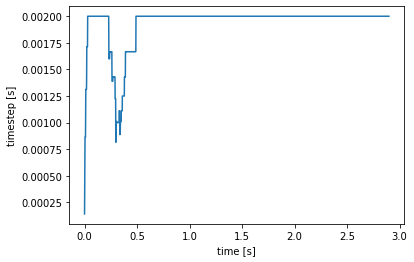

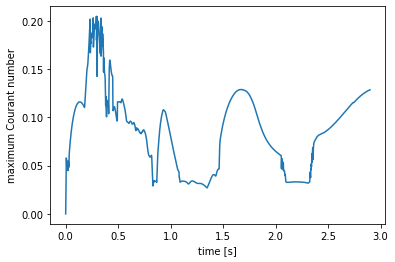

In [624]:
plt.plot(ts[:-1], list(map(lambda x: x[1] - x[0], zip(ts, ts[1:]))))
plt.xlabel("time [s]")
plt.ylabel("timestep [s]")
plt.show()
plt.plot(ts, maxcos)
plt.xlabel("time [s]")
plt.ylabel("maximum Courant number");